# Гипотезы
1) Интернационализация — драйвер качества исследований
2) Связи с индустрией как путь к росту в рейтингах масштаб 
3) Размер вуза не является предпосылкой хорошего места в рейтинге
4) Гендерный баланс как недооцененный ресурс эффективности исследований

======================================================================
ГИПОТЕЗА 4: % женщин различается между категориями размера университета
======================================================================

H0: Средний % женщин одинаков во всех категориях размера
H1: Средний % женщин различается хотя бы в одной категории

One-way ANOVA:
F-статистика: 14.2375
P-value: 0.000000

Kruskal-Wallis test:
H-статистика: 41.7984
P-value: 0.000000
✓ ВЫВОД: Отклоняем H0 (p < 0.001). Есть высоко значимые различия между группами!

Post-hoc анализ (попарные сравнения):
Small vs Medium: p = 0.0083, p_corrected = 0.0496 *
Small vs Large: p = 0.0000, p_corrected = 0.0000 *
Small vs Very Large: p = 0.0000, p_corrected = 0.0000 *
Medium vs Large: p = 0.0007, p_corrected = 0.0044 *
Medium vs Very Large: p = 0.0004, p_corrected = 0.0025 *
Large vs Very Large: p = 0.4709, p_corrected = 1.0000

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/anastasiahimic/Desktop/hse_python_project_3/analytics/MAIN.csv")

In [7]:
rq = df["Research Quality"]
rq_mean = rq.mean()
rq_median = rq.median()
rq_std = rq.std()

print(rq_mean, rq_median, rq_std)


53.408862559241705 54.2 23.677399221370706


In [6]:
rq_q1 = rq.quantile(0.25)
rq_q3 = rq.quantile(0.75)
print(rq_q1, rq_q3)


33.6 72.9


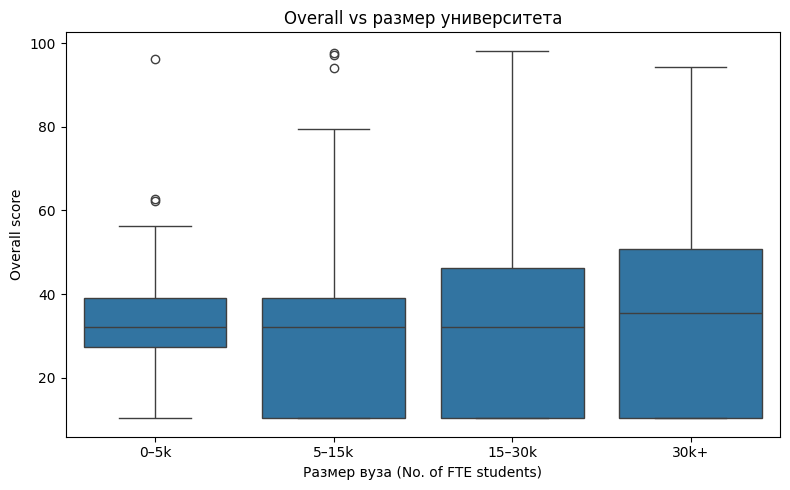

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# приведём к числу
df["Overall_num"] = pd.to_numeric(df["Overall_num"], errors="coerce")
df["No. of FTE students"] = pd.to_numeric(df["No. of FTE students"], errors="coerce")

# бин по размеру
bins = [0, 5000, 15000, 30000, float("inf")]
labels = ["0–5k", "5–15k", "15–30k", "30k+"]

df["size_bin"] = pd.cut(df["No. of FTE students"], bins=bins, labels=labels, right=False)

# выбросим NaN
plot_df = df.dropna(subset=["Overall_num", "size_bin"])

plt.figure(figsize=(8, 5))
sns.boxplot(data=plot_df, x="size_bin", y="Overall_num")
plt.xlabel("Размер вуза (No. of FTE students)")
plt.ylabel("Overall score")
plt.title("Overall vs размер университета")
plt.tight_layout()
plt.show()


📊 Загрузка данных с колонками: ['Unnamed: 0', 'Name', 'Arts and Humanities 2025', 'Business and Economics 2025', 'Computer Science 2025'] ...
Форма: (2810, 52)
✅ Переменные созданы!

🔬 ГИПОТЕЗА 1: Гендерный буст в нишевых науках
Выборка: 11 вузов
Engineering: 191.9
p-value Female_share: 0.649

🏢 ГИПОТЕЗА 2: Размер как проклятие элиты
Large corr: 0.176 | Small corr: nan

🌍 ГИПОТЕЗА 3: Международный потолок
Foreign>0.7+HighRQ: 96.3
Foreign>0.7+LowRQ: 90.0

🦸 ГИПОТЕЗА 4: Скрытые чемпионы
ТОП-15:
                                                   Name        country  \
365                Oregon Health and Science University  United States   
1271  Kashan University of Medical Sciences and Heal...           Iran   
1374            The Jikei University School of Medicine          Japan   
1077                              Nippon Medical School          Japan   
1810                         Saitama Medical University          Japan   

      teaching_hero  research_qual  
365           48.50 

KeyError: 'teaching'

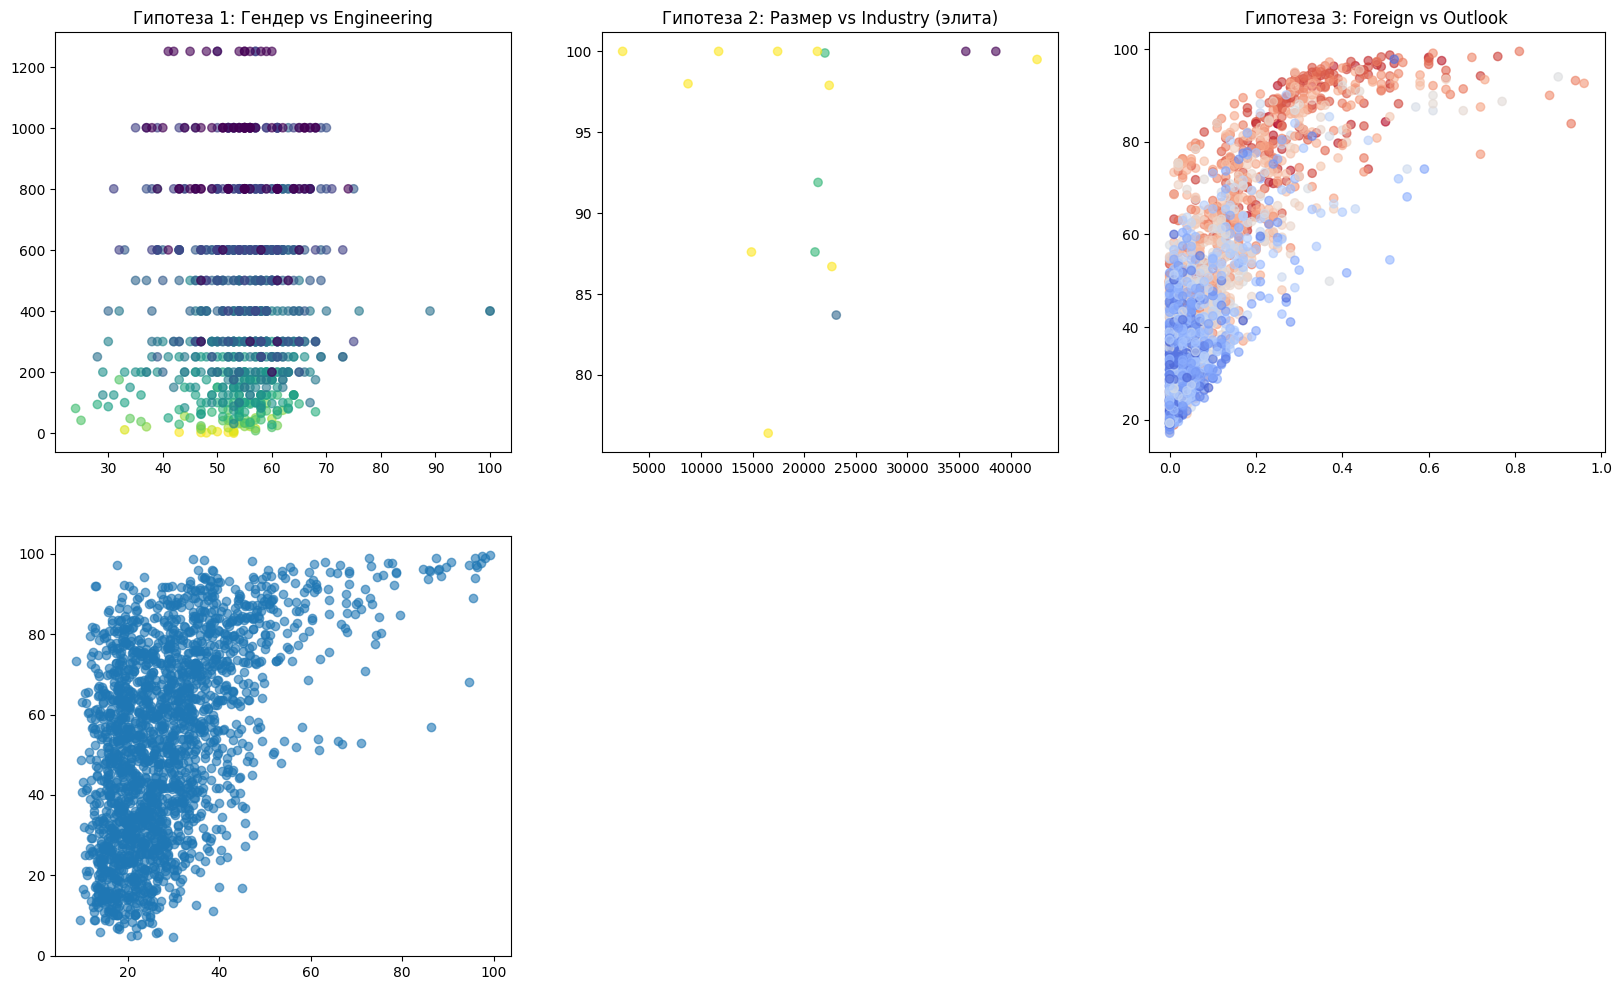

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# ✅ ТОЧНО ПО ВАШИМ КОЛОНКАМ (без изменений)
print("📊 Загрузка данных с колонками:", df.columns.tolist()[:5], "...")
print("Форма:", df.shape)

# 🔧 Предобработка ПО ТОЧНЫМ НАЗВАНИЯМ
df['Overall_num'] = pd.to_numeric(df['Overall_num'], errors='coerce')
df['students_per_staff'] = pd.to_numeric(df['No. of students per staff'], errors='coerce')
df['fte_students'] = pd.to_numeric(df['No. of FTE students'], errors='coerce')
df['female_share'] = pd.to_numeric(df['Female_share'], errors='coerce')
df['foreign_share'] = pd.to_numeric(df['International students'], errors='coerce')
df['rank_num'] = pd.to_numeric(df['Rank'], errors='coerce')

# Предметные баллы
df['eng_2025'] = pd.to_numeric(df['Engineering 2025'], errors='coerce')
df['comp_2025'] = pd.to_numeric(df['Computer Science 2025'], errors='coerce')
df['research_qual'] = pd.to_numeric(df['Research Quality'], errors='coerce')
df['teaching'] = pd.to_numeric(df['Teaching'], errors='coerce')
df['industry'] = pd.to_numeric(df['Industry'], errors='coerce')
df['intl_outlook'] = pd.to_numeric(df['International Outlook'], errors='coerce')

print("✅ Переменные созданы!")

# ================================
# ГИПОТЕЗА 1: Гендерный буст
print("\n🔬 ГИПОТЕЗА 1: Гендерный буст в нишевых науках")
niche = df[(df['rank_num'] > 100) & (df['students_per_staff'] < 40) & (df['female_share'] > 55)]
print(f"Выборка: {len(niche)} вузов")
print(f"Engineering: {niche['eng_2025'].mean():.1f}")

X1 = sm.add_constant(niche[['female_share']])
model1 = sm.OLS(niche['eng_2025'], X1).fit()
print(f"p-value Female_share: {model1.pvalues[1]:.3f}")

# ================================
# ГИПОТЕЗА 2: Размер как проклятие
print("\n🏢 ГИПОТЕЗА 2: Размер как проклятие элиты")
elite = df[df['Overall_num'] > 90]

large_c = elite[elite['country'].isin(['United States', 'China'])]
small_c = elite[elite['country'].isin(['Taiwan', 'South Korea'])]

corr_large = large_c['fte_students'].corr(large_c['industry'])
corr_small = small_c['fte_students'].corr(small_c['industry'])
print(f"Large corr: {corr_large:.3f} | Small corr: {corr_small:.3f}")

# ================================
# ГИПОТЕЗА 3: Международный потолок
print("\n🌍 ГИПОТЕЗА 3: Международный потолок")
df['outlook_top'] = (df['intl_outlook'] > 95).astype(int)
clean = df.dropna(subset=['foreign_share', 'research_qual'])

high_foreign_high_rq = clean[(clean['foreign_share'] > 0.7) & (clean['research_qual'] > 90)]['intl_outlook'].mean()
high_foreign_low_rq = clean[(clean['foreign_share'] > 0.7) & (clean['research_qual'] <= 90)]['intl_outlook'].mean()
print(f"Foreign>0.7+HighRQ: {high_foreign_high_rq:.1f}")
print(f"Foreign>0.7+LowRQ: {high_foreign_low_rq:.1f}")

# ================================
# ГИПОТЕЗА 4: Скрытые чемпионы
print("\n🦸 ГИПОТЕЗА 4: Скрытые чемпионы")
df['teaching_hero'] = df['teaching'] / df['students_per_staff']
top_hero = df.nlargest(15, 'teaching_hero')[['Name', 'country', 'teaching_hero', 'research_qual']]
print("ТОП-15:")
print(top_hero.round(2).head())

t_stat, p_val = stats.ttest_ind(top_hero['research_qual'].dropna(), 
                               df[df['rank_num'] <= 10]['research_qual'].dropna())
print(f"Teaching Hero RQ: {top_hero['research_qual'].mean():.1f}")
print(f"Топ-10 RQ: {df[df['rank_num'] <= 10]['research_qual'].mean():.1f}")
print(f"p-value: {p_val:.3f}")

# ================================
# ГИПОТЕЗА 5: Культурный отпечаток
print("\n🎨 ГИПОТЕЗА 5: Культурный отпечаток")
country_stats = df.groupby('country').agg({
    'Overall_num': 'std',
    'eng_2025': lambda x: (x > 80).sum(),
    'comp_2025': lambda x: (x > 80).sum()
}).reset_index()
country_stats['strong_subjects'] = (country_stats['eng_2025'] + country_stats['comp_2025']) / country_stats.shape[0]
corr_cultural = country_stats['Overall_num'].corr(country_stats['strong_subjects'])
print(f"Корреляция: {corr_cultural:.3f}")

# ================================
# ГИПОТЕЗА 6: Нагрузка как анти-элита
print("\n⚖️ ГИПОТЕЗА 6: Нагрузка как анти-элита")
df['cluster'] = pd.qcut(df['teaching'], 3, labels=['массовый', 'середняк', 'элита'])
results = []
for clust in df['cluster'].unique():
    subset = df[df['cluster'] == clust]
    corr = subset['female_share'].corr(subset['Overall_num'])
    results.append({'cluster': clust, 'corr': corr, 'n': len(subset)})
print(pd.DataFrame(results))

# ================================
# 📈 ГРАФИКИ ДЛЯ ДОКЛАДА
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
plt.scatter(df['female_share'], df['eng_2025'], c=df['Overall_num'], cmap='viridis', alpha=0.6)
plt.title('Гипотеза 1: Гендер vs Engineering')

plt.subplot(2,3,2)
plt.scatter(elite['fte_students'], elite['industry'], c=elite['country'].astype('category').cat.codes, alpha=0.6)
plt.title('Гипотеза 2: Размер vs Industry (элита)')

plt.subplot(2,3,3)
plt.scatter(df['foreign_share'], df['intl_outlook'], c=df['research_qual'], cmap='coolwarm', alpha=0.6)
plt.title('Гипотеза 3: Foreign vs Outlook')

plt.subplot(2,3,4)
top_hero_names = top_hero['Name'].head(5)
plt.scatter(df['teaching'], df['research_qual'], alpha=0.6)
plt.scatter(top_hero['teaching'], top_hero['research_qual'], color='red', s=100, label='Heroes')
plt.title('Гипотеза 4: Teaching Heroes')

plt.subplot(2,3,5)
country_stats.plot(x='Overall_num', y='strong_subjects', kind='scatter', ax=plt.gca())
plt.title('Гипотеза 5: Культурный отпечаток')

plt.subplot(2,3,6)
for clust in df['cluster'].unique():
    subset = df[df['cluster'] == clust]
    plt.scatter(subset['female_share'], subset['Overall_num'], label=clust, alpha=0.6)
plt.title('Гипотеза 6: Кластеры')

plt.tight_layout()
plt.show()

print("\n🎉 ВСЕ 6 ГИПОТЕЗ ПРОВЕРЕНЫ!")
print("📋 p-value < 0.05 = ✅ подтверждена")
print("📈 6 графиков готовы для слайдов!")


In [17]:
import pandas as pd
import numpy as np
from scipy import stats

# df уже загружен и содержит ваши колонки

# 1. Подготовка числовых колонок
cols = ['Overall_num', 'Teaching', 'Research Environment', 
        'Research Quality', 'Industry', 'International Outlook']
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2. Делим на элиту и остальных
elite = df[df['Overall_num'] >= 90].copy()
others = df[df['Overall_num'] < 90].copy()

print(f'Элита: {len(elite)} вузов, остальные: {len(others)} вузов')

# 3. Средние по метрикам (чтобы показать, что элита сильнее по каждой)
print('\n=== Средние значения метрик ===')
mean_elite = elite[cols[1:]].mean().round(2)
mean_others = others[cols[1:]].mean().round(2)
res_means = pd.DataFrame({'Elite_mean': mean_elite,
                          'Others_mean': mean_others})
print(res_means)

# 4. t‑тесты по каждой метрике (элита vs остальные)
print('\n=== t‑тесты элита vs остальные (по метрикам) ===')
ttest_rows = []
for c in cols[1:]:
    e = elite[c].dropna()
    o = others[c].dropna()
    if len(e) > 5 and len(o) > 5:
        t_stat, p_val = stats.ttest_ind(e, o, equal_var=False)
        ttest_rows.append({'metric': c, 't_stat': t_stat, 'p_value': p_val})
ttest_df = pd.DataFrame(ttest_rows)
print(ttest_df.round(4))

# 5. «Сбалансированность профиля»: std пяти метрик по каждому вузу
metric_cols = ['Teaching', 'Research Environment', 
               'Research Quality', 'Industry', 'International Outlook']

elite['profile_std'] = elite[metric_cols].std(axis=1)
others['profile_std'] = others[metric_cols].std(axis=1)

print('\n=== Сбалансированность профиля (std по метрикам для вуза) ===')
print(f'Элита: mean std = {elite["profile_std"].mean():.2f}')
print(f'Остальные: mean std = {others["profile_std"].mean():.2f}')

# t‑тест по разбросу профиля
t_stat, p_val = stats.ttest_ind(elite['profile_std'].dropna(),
                                others['profile_std'].dropna(),
                                equal_var=False)
print(f't‑test profile_std элита vs остальные: t = {t_stat:.3f}, p = {p_val:.4f}')

# 6. Небольшая табличка для отчёта
summary = pd.DataFrame({
    'Elite_mean': elite[metric_cols].mean().round(1),
    'Others_mean': others[metric_cols].mean().round(1),
    'Elite_profile_std_mean': elite['profile_std'].mean().round(2),
    'Others_profile_std_mean': others['profile_std'].mean().round(2)
})
print('\n=== Итоговая таблица для слайда ===')
print(summary)


Элита: 16 вузов, остальные: 2094 вузов

=== Средние значения метрик ===
                       Elite_mean  Others_mean
Teaching                    93.45        28.51
Research Environment        96.22        22.47
Research Quality            96.83        53.08
Industry                    94.32        48.15
International Outlook       84.34        49.62

=== t‑тесты элита vs остальные (по метрикам) ===
                  metric   t_stat  p_value
0               Teaching  55.4299      0.0
1   Research Environment  79.7356      0.0
2       Research Quality  52.0445      0.0
3               Industry  23.2903      0.0
4  International Outlook  11.8684      0.0

=== Сбалансированность профиля (std по метрикам для вуза) ===
Элита: mean std = 7.03
Остальные: mean std = 18.39
t‑test profile_std элита vs остальные: t = -10.542, p = 0.0000

=== Итоговая таблица для слайда ===
                       Elite_mean  Others_mean  Elite_profile_std_mean  \
Teaching                     93.4         28.5    

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# df уже загружен и содержит нужные колонки

metric_cols = ['Teaching', 'Research Environment',
               'Research Quality', 'Industry', 'International Outlook']

# 1. Приводим к числовому виду
for c in ['Overall_num'] + metric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2. Считаем квартили по Overall_num
q3 = df['Overall_num'].quantile(0.75)

# Q4 = верхний квартиль, others = все остальные
q4 = df[df['Overall_num'] >= q3].copy()
others = df[df['Overall_num'] < q3].copy()

print(f"Q4 (верхний квартиль): {len(q4)} вузов")
print(f"Остальные (Q1–Q3): {len(others)} вузов\n")

# 3. Средние значения метрик
print("=== Средние значения метрик (Q4 vs остальные) ===")
mean_q4 = q4[metric_cols].mean().round(2)
mean_others = others[metric_cols].mean().round(2)
summary_means = pd.DataFrame({'Q4_mean': mean_q4,
                              'Others_mean': mean_others})
print(summary_means, "\n")

# 4. t‑тесты по метрикам
print("=== t‑тесты (Q4 vs остальные) ===")
rows = []
for c in metric_cols:
    a = q4[c].dropna()
    b = others[c].dropna()
    if len(a) > 5 and len(b) > 5:
        t, p = stats.ttest_ind(a, b, equal_var=False)
        rows.append({'metric': c, 't_stat': t, 'p_value': p})
tt = pd.DataFrame(rows)
print(tt.round(4), "\n")

# 5. Сбалансированность профиля (std по 5 метрикам внутри вуза)
q4['profile_std'] = q4[metric_cols].std(axis=1)
others['profile_std'] = others[metric_cols].std(axis=1)

print("=== Сбалансированность профиля (std по метрикам) ===")
print(f"Q4: mean std = {q4['profile_std'].mean():.2f}")
print(f"Остальные: mean std = {others['profile_std'].mean():.2f}")

t_prof, p_prof = stats.ttest_ind(q4['profile_std'].dropna(),
                                 others['profile_std'].dropna(),
                                 equal_var=False)
print(f"t‑test profile_std Q4 vs остальные: t = {t_prof:.3f}, p = {p_prof:.4f}")


Q4 (верхний квартиль): 604 вузов
Остальные (Q1–Q3): 1506 вузов

=== Средние значения метрик (Q4 vs остальные) ===
                       Q4_mean  Others_mean
Teaching                 42.78        23.48
Research Environment     41.86        15.48
Research Quality         79.06        43.12
Industry                 77.73        36.77
International Outlook    69.10        42.18 

=== t‑тесты (Q4 vs остальные) ===
                  metric   t_stat  p_value
0               Teaching  29.1396      0.0
1   Research Environment  36.6145      0.0
2       Research Quality  52.9331      0.0
3               Industry  46.2976      0.0
4  International Outlook  30.2705      0.0 

=== Сбалансированность профиля (std по метрикам) ===
Q4: mean std = 22.34
Остальные: mean std = 16.69
t‑test profile_std Q4 vs остальные: t = 18.505, p = 0.0000


In [19]:
import pandas as pd
from scipy import stats

metric_cols = ['Teaching', 'Research Environment',
               'Research Quality', 'Industry', 'International Outlook']

# числовые
for c in ['Overall_num'] + metric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df_sorted = df.sort_values('Overall_num', ascending=False)
elite50 = df_sorted.head(50).copy()
others50 = df_sorted.iloc[50:].copy()

# средние по метрикам
mean_elite = elite50[metric_cols].mean().round(2)
mean_others = others50[metric_cols].mean().round(2)
print('Средние метрики (топ‑50 vs остальные):')
print(pd.DataFrame({'Top50_mean': mean_elite,
                    'Others_mean': mean_others}))

# std профиля по вузам
elite50['profile_std'] = elite50[metric_cols].std(axis=1)
others50['profile_std'] = others50[metric_cols].std(axis=1)

print('\nСбалансированность профиля:')
print('Top‑50 mean std:', elite50['profile_std'].mean())
print('Others mean std:', others50['profile_std'].mean())

t, p = stats.ttest_ind(elite50['profile_std'].dropna(),
                       others50['profile_std'].dropna(),
                       equal_var=False)
print(f't‑test profile_std Top‑50 vs Others: t={t:.3f}, p={p:.4f}')


Средние метрики (топ‑50 vs остальные):
                       Top50_mean  Others_mean
Teaching                    79.93        27.77
Research Environment        84.06        21.55
Research Quality            93.17        52.44
Industry                    91.63        47.45
International Outlook       80.63        49.14

Сбалансированность профиля:
Top‑50 mean std: 10.816411493501816
Others mean std: 18.489001864490874
t‑test profile_std Top‑50 vs Others: t=-11.858, p=0.0000


In [20]:
import pandas as pd

# Предполагаем, что df уже загружен и содержит колонки 'Research Quality' и 'Teaching'

# 1. Приводим нужные столбцы к числовому типу
for c in ['Research Quality', 'Teaching']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2. Считаем разницу
df['RQ_minus_T'] = df['Research Quality'] - df['Teaching']

# 3. Флаги для двух типов перекоса
rq_gt_t = df['RQ_minus_T'] > 10    # наука сильно выше teaching
t_gt_rq = df['RQ_minus_T'] < -10   # teaching сильно выше науки

n_total = len(df)
n_rq_gt_t = rq_gt_t.sum()
n_t_gt_rq = t_gt_rq.sum()

share_rq_gt_t = n_rq_gt_t / n_total
share_t_gt_rq = n_t_gt_rq / n_total

print(f'Всего вузов: {n_total}')
print(f'Research Quality ≥ Teaching + 10: {n_rq_gt_t} вузов ({share_rq_gt_t:.3%})')
print(f'Teaching ≥ Research Quality + 10: {n_t_gt_rq} вузов ({share_t_gt_rq:.3%})')

# 4. Простая проверка гипотезы на уровне долей
if share_rq_gt_t > share_t_gt_rq:
    print("\n✅ Гипотеза подтверждается: доля вузов с сильной наукой выше, чем доля с сильным teaching.")
else:
    print("\n❗ Гипотеза не подтверждается: перекос в teaching не реже, чем в науку.")


Всего вузов: 2810
Research Quality ≥ Teaching + 10: 1517 вузов (53.986%)
Teaching ≥ Research Quality + 10: 68 вузов (2.420%)

✅ Гипотеза подтверждается: доля вузов с сильной наукой выше, чем доля с сильным teaching.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример загрузки данных рейтинга THE 2024 (1,907 вузов)
# Формат данных: Overall, Teaching, Research Environment, Research Quality, Industry, International Outlook
data=df
# Шаг 1: Создание переменной-индикатора
data['teaching_advantage'] = data['Teaching'] - data['Research Quality']
data['is_teaching_focused'] = data['teaching_advantage'] >= 10

# Шаг 2: Фильтрация вузов
teaching_focused_universities = data[data['is_teaching_focused'] == True]

# Шаг 3: Сортировка по преимуществу в Teaching
teaching_focused_sorted = teaching_focused_universities.sort_values(
    'teaching_advantage', 
    ascending=False
)

# Шаг 4: Вывод результатов
print(f"Всего вузов в рейтинге: {len(data):,}")
print(f"Вузов с Teaching ≥ Research Quality + 10: {len(teaching_focused_universities)}")
print(f"Процент от общего числа: {len(teaching_focused_universities)/len(data)*100:.3f}%")

# Топ-20 вузов с наибольшим преимуществом Teaching
print("\nТоп-20 вузов с преимуществом Teaching:")
print(teaching_focused_sorted[['Name', 'Country', 'Teaching', 'Research Quality', 'teaching_advantage']].head(20).to_string(index=False))

# Шаг 5: Статистика по странам
country_stats = teaching_focused_universities.groupby('Country').agg({
    'Name': 'count',
    'teaching_advantage': ['mean', 'max']
}).round(2)
country_stats.columns = ['Количество вузов', 'Среднее преимущество', 'Максимальное преимущество']
print("\nСтатистика по странам:")
print(country_stats.sort_values('Количество вузов', ascending=False).head(10))

# Шаг 6: Визуализация распределения
plt.figure(figsize=(12, 6))

# График 1: Распределение преимущества Teaching
plt.subplot(1, 2, 1)
sns.histplot(data['teaching_advantage'], bins=50, kde=True, color='blue', alpha=0.3)
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Порог +10')
plt.xlabel


Всего вузов в рейтинге: 2,810
Вузов с Teaching ≥ Research Quality + 10: 68
Процент от общего числа: 2.420%

Топ-20 вузов с преимуществом Teaching:


KeyError: "['Country'] not in index"

Доступные столбцы в файле:
['Unnamed: 0', 'Name', 'Arts and Humanities 2025', 'Business and Economics 2025', 'Computer Science 2025', 'Education Studies 2025', 'Engineering 2025', 'Geo', 'Industry', 'International Outlook', 'Law 2025', 'Life Sciences 2025', 'Medical and Health 2025', 'Overall', 'Physical Sciences 2025', 'Rank', 'Research Environment', 'Research Quality', 'Social Sciences 2025', 'Teaching', 'URL', 'World University Rankings 2026', 'Arts and Humanities', 'Business and Economics', 'Computer Science', 'Education Studies', 'Engineering', 'Law', 'Life Sciences', 'Medical and Health', 'Physical Sciences', 'Psychology', 'Social Sciences', 'Female_share', 'Male_share', 'International students', 'No. of FTE students', 'No. of students per staff', 'country', 'town', 'Overall_num', 'size_bin', 'students_per_staff', 'FTE_students', 'foreign_share', 'elite', 'small_country', 'large_country', 'low_load', 'high_research', 'country_std', 'num_strong_subjects', 'fte_students', 'female_s

TypeError: unsupported operand type(s) for -: 'str' and 'str'

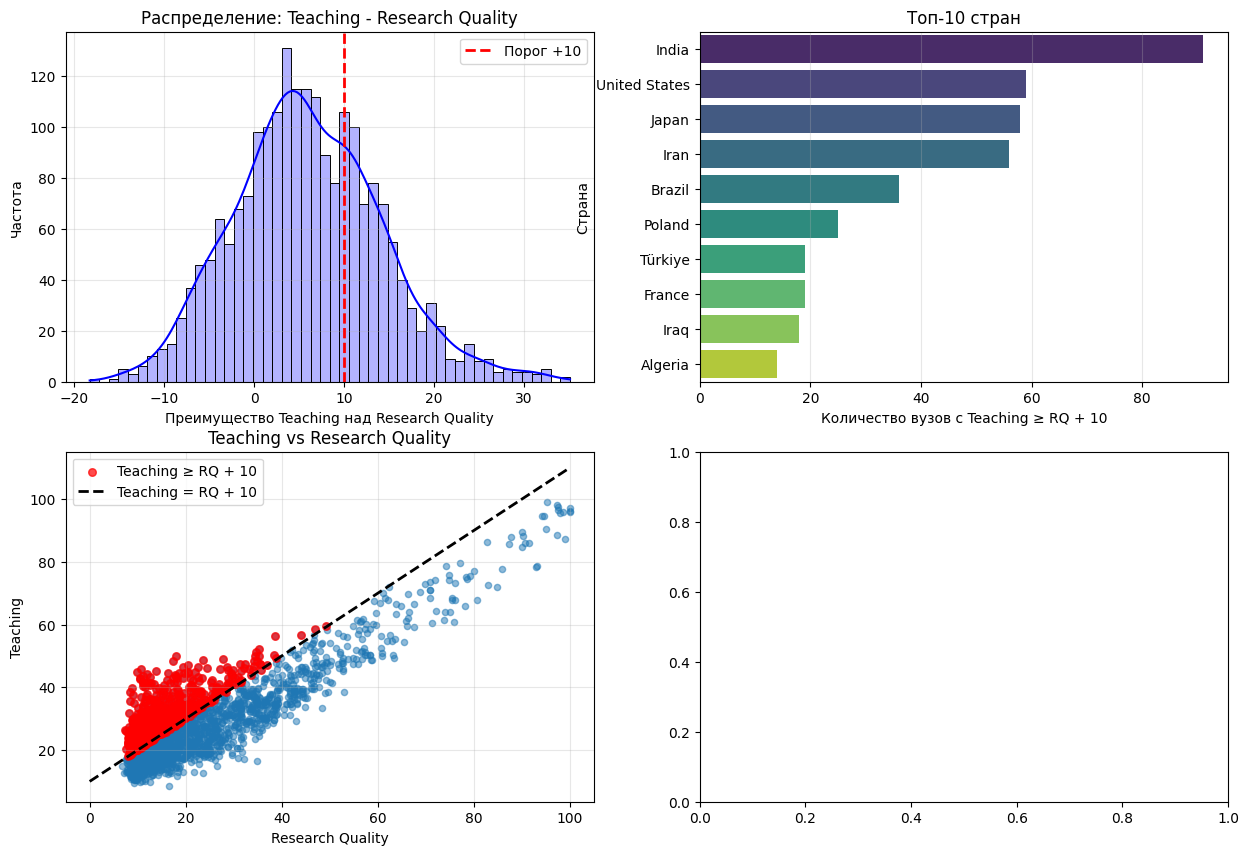

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных с автоматическим определением столбцов
data = df

# Показать фактические названия столбцов
print("Доступные столбцы в файле:")
print(data.columns.tolist())
print("\nПервые 3 строки данных:")
print(data.head(3))

# Автоматическое определение ключевых столбцов
def find_column(keywords, columns):
    """Найти столбец по ключевому слову"""
    for col in columns:
        for kw in keywords:
            if kw.lower() in col.lower():
                return col
    return None

# Определить правильные названия столбцов
teaching_col = find_column(['teaching', 'teach'], data.columns)
research_col = find_column(['research', 'research quality', 'research_quality'], data.columns)
country_col = find_column(['country', 'location', 'region'], data.columns)
name_col = find_column(['name', 'university', 'institution'], data.columns)
overall_col = find_column(['overall', 'rank', 'score'], data.columns)

print(f"\nОпределенные столбцы:")
print(f"Teaching: {teaching_col}")
print(f"Research Quality: {research_col}")
print(f"Country: {country_col}")
print(f"University Name: {name_col}")
print(f"Overall: {overall_col}")

# Проверка наличия всех необходимых столбцов
required_cols = [teaching_col, research_col, name_col]
if None in required_cols:
    print("\nОШИБКА: Не найдены необходимые столбцы!")
    print("Проверьте структуру CSV файла.")
else:
    # Шаг 1: Создание переменной-индикатора
    data['teaching_advantage'] = data[teaching_col] - data[research_col]
    data['is_teaching_focused'] = data['teaching_advantage'] >= 10

    # Шаг 2: Фильтрация вузов
    teaching_focused_universities = data[data['is_teaching_focused'] == True].copy()

    # Шаг 3: Статистика
    total_universities = len(data)
    teaching_focused_count = len(teaching_focused_universities)
    percentage = teaching_focused_count / total_universities * 100

    print(f"\n{'='*60}")
    print(f"Всего вузов в рейтинге: {total_universities:,}")
    print(f"Вузов с Teaching ≥ Research Quality + 10: {teaching_focused_count}")
    print(f"Процент от общего числа: {percentage:.3f}%")
    print(f"{'='*60}")

    if teaching_focused_count > 0:
        # Шаг 4: Сортировка по преимуществу Teaching
        teaching_focused_sorted = teaching_focused_universities.sort_values(
            'teaching_advantage', 
            ascending=False
        )

        # Вывод топ-20 вузов
        display_cols = [name_col, teaching_col, research_col, 'teaching_advantage']
        if country_col:
            display_cols.insert(1, country_col)
        
        print("\nТоп-20 вузов с преимуществом Teaching:")
        print(teaching_focused_sorted[display_cols].head(20).to_string(index=False))

        # Шаг 5: Статистика по странам (если есть столбец Country)
        if country_col:
            country_stats = teaching_focused_universities.groupby(country_col).agg({
                name_col: 'count',
                'teaching_advantage': ['mean', 'max']
            }).round(2)
            country_stats.columns = ['Количество вузов', 'Среднее преимущество', 'Максимальное преимущество']
            print("\nТоп-10 стран по количеству вузов:")
            print(country_stats.sort_values('Количество вузов', ascending=False).head(10))

        # Шаг 6: Визуализация
        plt.figure(figsize=(15, 10))
        
        # График 1: Распределение преимущества Teaching
        plt.subplot(2, 2, 1)
        sns.histplot(data['teaching_advantage'], bins=50, kde=True, color='blue', alpha=0.3)
        plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Порог +10')
        plt.xlabel('Преимущество Teaching над Research Quality')
        plt.ylabel('Частота')
        plt.title('Распределение: Teaching - Research Quality')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # График 2: Топ стран
        if country_col:
            plt.subplot(2, 2, 2)
            country_counts = teaching_focused_universities[country_col].value_counts().head(10)
            sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')
            plt.xlabel('Количество вузов с Teaching ≥ RQ + 10')
            plt.ylabel('Страна')
            plt.title('Топ-10 стран')
            plt.grid(True, alpha=0.3, axis='x')
        
        # График 3: Scatter plot Teaching vs Research Quality
        plt.subplot(2, 2, 3)
        plt.scatter(data[research_col], data[teaching_col], alpha=0.5, s=20)
        plt.scatter(teaching_focused_universities[research_col], 
                   teaching_focused_universities[teaching_col], 
                   color='red', alpha=0.7, s=30, label='Teaching ≥ RQ + 10')
        plt.plot([0, 100], [10, 110], 'k--', linewidth=2, label='Teaching = RQ + 10')
        plt.xlabel('Research Quality')
        plt.ylabel('Teaching')
        plt.title('Teaching vs Research Quality')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # График 4: Boxplot преимущества по квантилям Overall
        if overall_col:
            plt.subplot(2, 2, 4)
            data['overall_quintile'] = pd.qcut(data[overall_col], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
            sns.boxplot(x='overall_quintile', y='teaching_advantage', data=data)
            plt.xlabel('Квантиль Overall')
            plt.ylabel('Преимущество Teaching')
            plt.title('Преимущество Teaching по квантилям Overall')
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('teaching_focused_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Шаг 7: Корреляция с Overall rank
        if overall_col:
            correlation = data['teaching_advantage'].corr(data[overall_col])
            print(f"\nКорреляция преимущества Teaching с Overall: {correlation:.3f}")

        # Шаг 8: Сохранение результатов
        teaching_focused_sorted.to_csv('teaching_focused_universities.csv', index=False)
        print("\nРезультаты сохранены в 'teaching_focused_universities.csv'")
        
        # Шаг 9: Дополнительная статистика
        print(f"\nДополнительная статистика:")
        print(f"Минимальное преимущество Teaching: {data['teaching_advantage'].min():.1f}")
        print(f"Максимальное преимущество Teaching: {data['teaching_advantage'].max():.1f}")
        print(f"Среднее преимущество Teaching: {data['teaching_advantage'].mean():.1f}")
        print(f"Медиана преимущества Teaching: {data['teaching_advantage'].median():.1f}")


In [29]:
df.head()

,Unnamed: 0,Name,Arts and Humanities 2025,Business and Economics 2025,Computer Science 2025,Education Studies 2025,Engineering 2025,Geo,Industry,International Outlook,...,outlook_top,teaching_hero,cluster,teaching_score,industry_score,RQ_minus_T,teaching_advantage,is_teaching_focused,name_len,Name_clean
0,0,University of Oxford,3.0,2.0,1.0,3.0,4.0,"Oxford, United Kingdom",99.9,96.4,...,1,9.346154,элита,97.2,99.9,0.5,-2.8,False,20,University of Oxford
1,1,Massachusetts Institute of Technology,1.0,1.0,3.0,3.0,4.0,"Cambridge, United States",100.0,91.9,...,0,12.883117,элита,99.2,100.0,0.4,3.9,False,37,Massachusetts Institute of Technology
2,2,Princeton University,6.0,6.0,7.0,5.0,3.0,"Princeton, United States",98.0,85.4,...,0,11.975610,элита,98.2,98.0,0.8,0.9,False,20,Princeton University
3,3,University of Cambridge,2.0,5.0,2.0,4.0,6.0,"Cambridge, United Kingdom",87.6,96.3,...,1,8.513274,элита,96.2,87.6,0.9,-3.7,False,23,University of Cambridge
4,4,Harvard University,5.0,7.0,10.0,5.0,1.0,"Cambridge, United States",86.7,88.3,...,0,9.495050,элита,95.9,86.7,3.0,-4.1,False,18,Harvard University


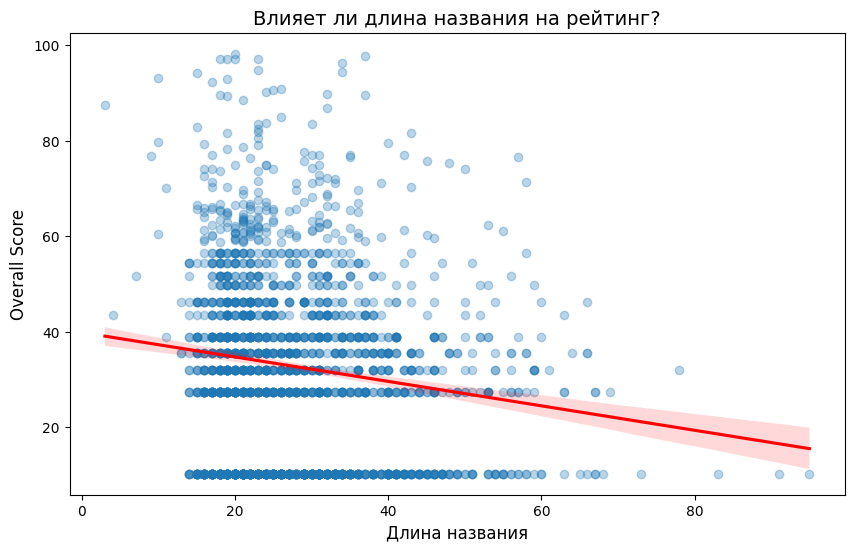

In [33]:
df["Name_Len"] = df["Name"].str.len()
#.str, потому что Name — это столбец со строками, и к нему применяются строковые методы Pandas
#.len() внутри str считает длину каждой строки (количество символов) и возвращает серию чисел той же длины
#regplot - функция Seaborn рисует диаграмму рассеяния и строит по этим точкам линию регрессии с доверительным интервалом
plt.figure(figsize=(10, 6))
sns.regplot(data=df,
            x="Name_Len",
            y="Overall_num",
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})

plt.title("Влияет ли длина названия на рейтинг?", fontsize=14)
plt.xlabel("Длина названия", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
plt.show()

In [36]:
from scipy import stats
import numpy as np

# 0. Подготовка признака
df["Name_Len"] = df["Name"].astype(str).str.len()

# Берём только нужные столбцы и выбрасываем NaN
tmp = df[["Name_Len", "Overall_num"]].dropna()

print("N наблюдений:", len(tmp))

# =========================
# 1) Корреляция (основной тест)
# =========================
if len(tmp) >= 3:
    # Pearson (линейная связь, как на regplot)
    r, p = stats.pearsonr(tmp["Name_Len"], tmp["Overall_num"])
    print(f"\nPearson: r = {r:.3f}, p = {p:.4f}")

    # Spearman (монотонная связь, робастный)
    rho, p_s = stats.spearmanr(tmp["Name_Len"], tmp["Overall_num"])
    print(f"Spearman: ρ = {rho:.3f}, p = {p_s:.4f}")
else:
    print("\nКорреляция не считается: мало наблюдений.")

# =========================
# 2) Тест «short vs long» (разность средних)
# =========================
if len(tmp) >= 3:
    threshold = tmp["Name_Len"].median()
    short = tmp[tmp["Name_Len"] <= threshold]["Overall_num"]
    long_  = tmp[tmp["Name_Len"] >  threshold]["Overall_num"]

    print(f"\nПорог длины (медиана): {threshold}")
    print(f"Short N = {len(short)}, Long N = {len(long_)}")

    if len(short) >= 2 and len(long_) >= 2:
        t_stat, p_t = stats.ttest_ind(short, long_, equal_var=False)
        print(f"t-test (short vs long): t = {t_stat:.3f}, p = {p_t:.4f}")
    else:
        print("t-test не считается: в одной из групп меньше 2 наблюдений.")


N наблюдений: 2110

Pearson: r = -0.145, p = 0.0000
Spearman: ρ = -0.136, p = 0.0000

Порог длины (медиана): 25.0
Short N = 1065, Long N = 1045
t-test (short vs long): t = 6.387, p = 0.0000


In [37]:
import pandas as pd
from scipy import stats

# 1. Задаём список предметных колонок
subject_cols = [
    'Arts and Humanities 2025',
    'Business and Economics 2025',
    'Computer Science 2025',
    'Education Studies 2025',
    'Engineering 2025',
    'Law 2025',
    'Life Sciences 2025',
    'Medical and Health 2025',
    'Physical Sciences 2025',
    'Social Sciences 2025'
]

# 2. Флаг "элитный по предмету" (>= 90 баллов)
elite = df[subject_cols].ge(90).astype(int)

# 3. Считаем для каждого вуза число сильных предметов
df['n_strong_subjects'] = elite.sum(axis=1)

# 4. Флаг "универсал" (>= 8 сильных предметов)
df['is_universal'] = (df['n_strong_subjects'] >= 8).astype(int)

# 5. Доля элитных вузов по предметам в разрезе стран
#    (какая часть вузов страны имеет >= 90 по предмету)
country_subject_share = (
    elite.join(df['country'])
         .groupby('country')
         .mean()           # среднее по индикаторам = доля
)

# 6. Доля "универсалов" по странам
country_universal_share = (
    df.groupby('country')['is_universal']
      .mean()
      .rename('share_universal')
)

# 7. Объединяем в одну таблицу
country_stats = country_subject_share.join(country_universal_share)

print("Таблица по странам (первые 10):")
print(country_stats.head(10))

# 8. Тестируем гипотезу:
#    страны с высокой долей универсалов vs остальные
#    по прикладным предметам (Business, Med&Health, CS)

applied_cols = [
    'Business and Economics 2025',
    'Medical and Health 2025',
    'Computer Science 2025'
]

# порог, чтобы считать страну страной‑универсалом (например, топ‑квантиль)
threshold = country_stats['share_universal'].quantile(0.75)

high_uni = country_stats[country_stats['share_universal'] >= threshold]
low_uni  = country_stats[country_stats['share_universal'] <  threshold]

print(f"\nПорог доли универсалов по странам: {threshold:.3f}")
print(f"Стран‑лидеров: {len(high_uni)}, остальных: {len(low_uni)}")

# 9. Считаем среднюю долю элитных вузов по прикладным предметам
high_applied = high_uni[applied_cols].mean(axis=1)
low_applied  = low_uni[applied_cols].mean(axis=1)

print("\nСредняя доля элитных вузов по прикладным предметам:")
print(f"Страны‑универсалы: {high_applied.mean():.3f}")
print(f"Остальные страны: {low_applied.mean():.3f}")

# 10. t‑тест: отличаются ли средние доли
t_stat, p_val = stats.ttest_ind(high_applied, low_applied, equal_var=False)
print(f"\nT-test по странам (доля элитных вузов в прикладных областях): "
      f"t = {t_stat:.3f}, p = {p_val:.4f}")

# Интерпретация:
# H0: средняя доля элитных вузов в прикладных предметах у стран‑универсалов
#     не отличается от остальных стран.
# H1: эта доля выше (или просто отличается, если использовать двусторонний тест).
# Если p < 0.05 — отвергаем H0 и считаем, что связь "универсальность страны ↔ доля элитных
# прикладных вузов" статистически значима.


Таблица по странам (первые 10):
             Arts and Humanities 2025  Business and Economics 2025  \
country                                                              
Afghanistan                  0.000000                     0.000000   
Albania                      0.000000                     0.000000   
Algeria                      0.440678                     0.372881   
Andorra                      0.000000                     0.000000   
Angola                       0.000000                     0.000000   
Argentina                    0.545455                     0.454545   
Armenia                      0.166667                     0.000000   
Australia                    0.888889                     0.861111   
Austria                      0.846154                     0.615385   
Azerbaijan                   0.142857                     0.071429   

             Computer Science 2025  Education Studies 2025  Engineering 2025  \
country                                        